
<a id="TMP_1e50"></a>

## Resumen

Este documento tiene como fin realizar el estudio de la configuración de un robot SCARA de tres eslabones, con uno de ellos fijo al sistema inercial y tres juntas rotacionales. Se tiene como propósito establecer la relacion entre posición, orientación y desplazamiento en las articulaciones. Asímismo se desarrollara el modelo cinemático de la pose, las velocidades y aceleraciones, desde el origen hasta el efector final.


Posteriormente, se planteará el modelo dinámico empleando el método de Euler\-Lagrange, considerando el modelo directo e inverso, cuyo objetivo es comprender el comportamiento del sistema es afectado por las juntas y la interacción entre los eslabones.

## Introducción

El robot SCARA, conocido formalmente como Selective Compliance Assembly Robot Arm (SCARA), se caracteriza por su alta velocidad y precisión en el posicionamiento. Estas ventajas han impulsado su amplia adopción en aplicaciones como el ensamblaje, la manipulación de materiales y el agarre. En consecuencia, los robots SCARA contribuyen de manera significativa a mejorar la eficiencia en la producción y han despertado un considerable interés de investigación dentro de la comunidad académica.


Debido a su configuración estructural inherente, el robot SCARA suele presentar una base volumétrica y ciertos eslabones de gran tamaño. Esta característica volumétrica plantea desafíos para su implementación en espacios de trabajo con restricciones estrictas de tamaño. \[1\]


La cinematica del robot se desarrolla con base en el modelo Denavit\-Hartenberg, y se construye un modelo cinemático con los marcos de referencia asociados. Se emplea el método de transformaciones homogéneas para formular el modelo cinemático del robot. Posteriormente, se derivan las soluciones tanto para la cinemática directa como para la inversa.


La dinámica es un problema común en la ingeniería y la robótica. A menudo se describe mediante ecuaciones no lineales de segundo orden, parametrizadas por una matriz de inercia dependiente de la configuración y un vector no lineal que contiene los términos de Coriolis y fuerzas centrífugas..


Estas ecuaciones constituyen la base fundamental para la simulación y el control de sistemas robóticos. En general, existen dos enfoques básicos para establecer la dinámica de los robots: la formulación de Newton–Euler y la formulación de Euler–Lagrange. La formulación de Euler–Lagrange es un enfoque basado en la energía, que trata con la energía potencial y cinética del robot. Cabe señalar que este método se vuelve muy complejo a medida que aumenta el número de eslabones en el sistema robótico. \[2\]


A diferencia de los robots SCARA comerciales, nuestro modelo está compuesto por tres eslabones y tres juntas rotacionales. Como consecuencia, el movimiento se limita principalmente al plano horizontal, por ende, se necesita desarrollar el modelo cinemático y dinámico del sistema. Permitiendo comprender su comportamiento y requerimientos necesarios para garantizar un funcionamiento óptimo.

<a id="TMP_9c1b"></a>

## Modelado del robot Scara

Definición de funciones


De acuerdo con el modelo de Denavit\-Hertenberg, esta matriz contine la matriz de orientación, el vector de posición y la escala del punto que se analiza.


In [1]:
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]


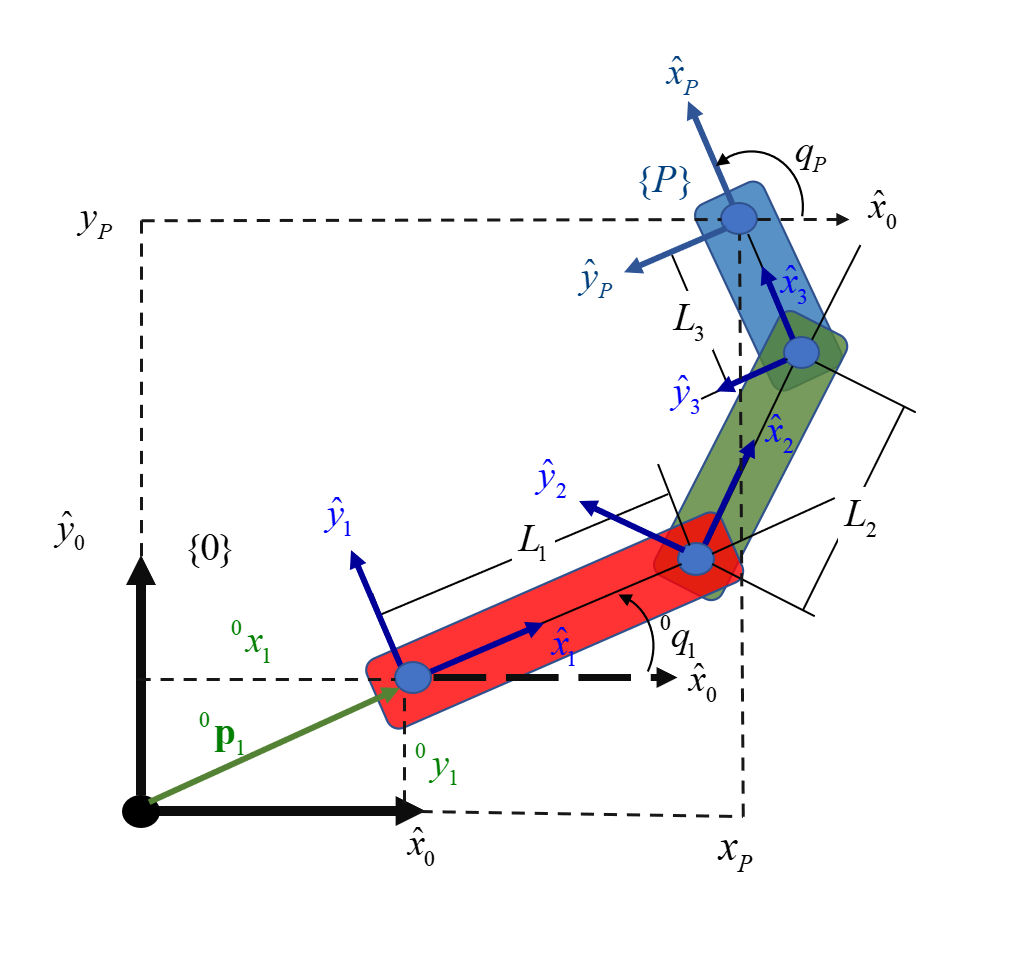

<a id="TMP_7c06"></a>

### Planteamiento del modelo cinemático de la posición

Se define incialmente un sistema de referencia inercial y los sistemas de coordenadas asociados a cada una de las juntas rotacionales, generando las restricciones de movimiento del robot. Del sistema inercial al sistema uno se tiene una rotación ${\;}^0 T_1$ , por ende la matriz tendrá solo valores en los componentes de XY, XX, YX, YY y Z ya que el ángulo afecta directamente al eje X y Y, y no hay un cambio en el eje Z. De este modo, la matriz resultante es la siguiente.


In [2]:
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1

T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1)


Para el caso de las matrices asociadas a los sistemas de referencia dos y tres, sólo se ve afectado el ángulo de la orientación. La posición solo depende de la longitud del eslabón por la orientación del eje x. Por ende las matrices ${\;}^1 T_2$ yt ${\;}^2 T_3$ quedan como:


In [3]:
T_1_2 = Tij(L_1,0,0,0,0,theta_1_2)

In [4]:
T_2_3 = Tij(L_2,0,0,0,0,theta_2_3)


Para el punto P, no hay un cambio de orientación, solo hay un cambio de posición


In [5]:
T_3_P = Tij(L_3,0,0,0,0,0)


Para obtener la trasformada ${\;}^0 T_P$ se multiplican las trasformadas:


$${\;}^0 T_1$$
$${\;}^1 T_2$$
$${\;}^2 T_3$$
$${\;}^3 T_P$$
$$=$$
$${\;}^0 T_P$$

In [6]:

T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P)

### Modelo cinemático de la postura del robot
#### Vector de postura del robot

A partir de la matiz obtenida, se extrae la posición del punto P y el ángulo que afecta su orientación. Esto muestra los efectos que tienen las uniones sobre nuestro punto de interés. Estos valores formaran el vector de posicion, lo que permite determinar la posición y orientación del efector final en función de un conjunto determinado de variables conjuntas.


In [7]:
xi_O_P = [T_O_P(1,4);T_O_P(2,4);theta_O_1+theta_1_2+theta_2_3]

### Modelo cinemático inverso de la postura del robot

La cinemática inversa es el proceso inverso de la cinemática directa. En este método, las variables de articulación se determinan en función de la configuración deseada del efector final.


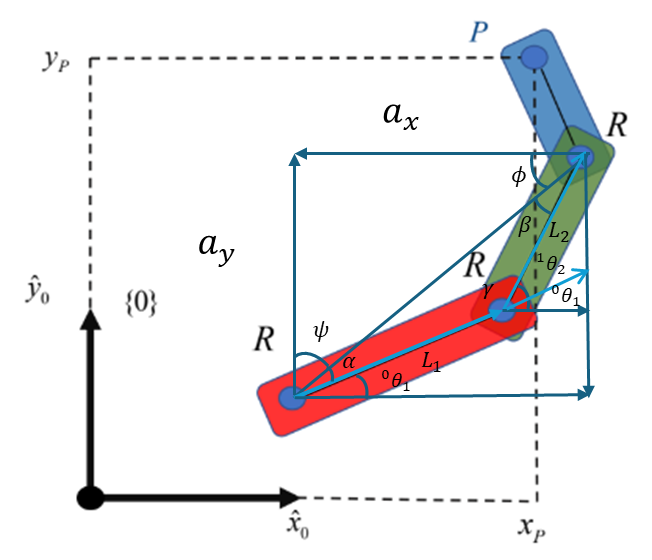


Para calcular el valor de los ángulos se utilizan las leyes de cosenos, de senos y el teorema de Pitágoras.


Ley de senos


$$\frac{\sin \left(\beta \right)}{L_1 }=\frac{\sin \left(\alpha \right)}{L_2 }=\frac{\sin \left(\gamma \right)}{R}$$

Ley de cosenos


$$R^2 =L_1^2 +L_2^2 -2L_1 L_2 \cos \left(\gamma \right)$$

$$L_1^2 =R^2 +L_2^2 -2L_2 \textrm{Rcos}\left(\beta \;\right)$$

$$L_2^2 =R^2 +L_1^2 -2L_1 \mathrm{Rcos}\left(\alpha \;\right)$$


In [8]:
a_y = L_1*sin(theta_O_1)+L_2*sin(theta_O_1+theta_1_2)

In [9]:
a_x = L_1*cos(theta_O_1)+L_2*cos(theta_O_1+theta_1_2)


Empleando el teorema de Pitágoras, es posible determinar la magnitud del vector R, el cual representa la distancia existente entre el sistema 1 y el sistema 2 del triángulo formado por las longitudes de los eslabones, de modo que se emplea la siguente expresión para calcularla:


$$R=\sqrt{a_x^2 +a_y^2 }$$

A partir de la ley de cosenos se obtiene el ángulo $\gamma$.


In [10]:
R = sqrt (a_x^2+a_y^2)

In [11]:
gamma = acos((R^2 - L_1^2)/(-2*L_1*L_2))


Para obtener el valor de $\theta_{1,2}$, dado que esta estrechamente relacionado con el valor de $\gamma$ dado que la suma de los dos angulos es igual a $\pi$, se emplea la expresión:


$$\theta_{1,2} =\pi -\textrm{acos}\left(\frac{R^2 -L_1^2 -L_2^2 }{2L_1 L_2 }\right)$$

Para encontrar la expresi+on de $\theta_{0,1}$ se calculan los ángulos $\alpha$ y $\psi \;$


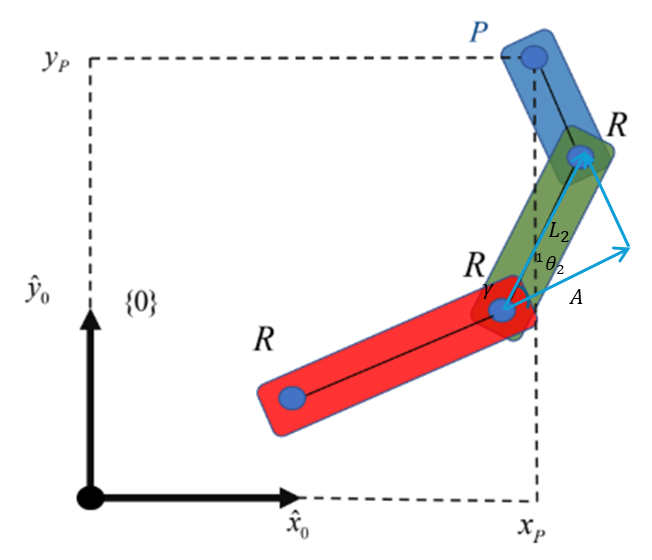


$$\cos \left({\;}^1 \theta_2 \right)=\frac{A}{L_2 }$$

$$A=L_2 \cos {\;}^1 \theta_2$$

$$\cos \left(\alpha \right)=\frac{L_1 +L_2 \cos \left(\theta_{1,2} \right)}{\sqrt{{\left(L_2 \cos \left(\theta_{1,2} +\theta_{O,1} \right)\right)}^2 +{\left(L_2 \sin \left(\theta_{1,2} +\theta_{o,1} \right)+L_1 \sin \left(\theta_{O,1} \right)\right)}^2 }}$$

$$\alpha =\textrm{acos}\left(\frac{L_1 +L_2 \cos \left(\theta_{1,2} \right)}{\sqrt{{\left(L_2 \cos \left(\theta_{1,2} +\theta_{O,1} \right)\right)}^2 +{\left(L_2 \sin \left(\theta_{1,2} +\theta_{o,1} \right)+L_1 \sin \left(\theta_{O,1} \right)\right)}^2 }}\right)$$

Para el cálculo de $\phi$ se emplea el triángulo rectángulo formado por $a_x$ y $a_y$, de modo que:


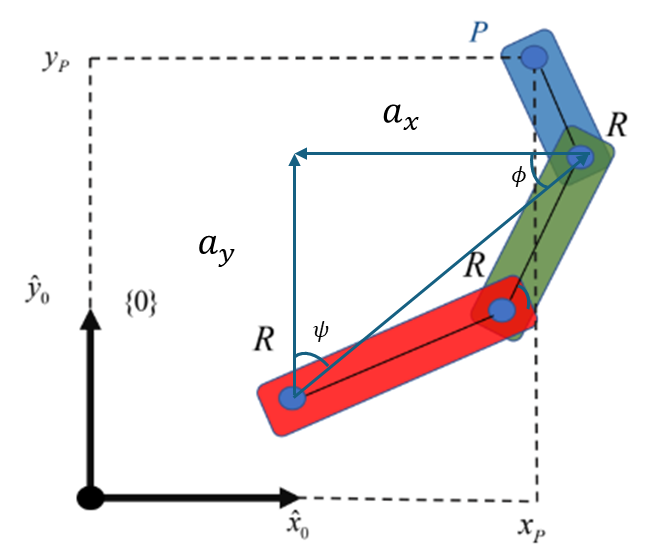


$$\tan \left(\psi \;\right)=\frac{a_y }{a_x }$$

$$\psi =\textrm{arctan2}\left(\frac{a_y }{a_x }\right)$$


In [12]:
phi = atan2(a_y,a_x)


La función atan2 nos permite observar la solución en los cuatro cuadrantes del plano, por lo que es útil para garantizar que la posición tenga una solución válida.


En el diagrama se puede observar que el ángulo $\psi$ es igual a la suma de los ángulos $\theta {\;}_{O,1}$ y $\alpha$. Por lo que se obtiene la siguiente relación.


$$\phi =\theta_{O,1} +\alpha \;$$

Despejando $\theta_{O,1}$


$$\theta_{O,1} =\phi -\alpha \;$$

Para obtener $\theta_{2,3}$, el procedimiento es similar.


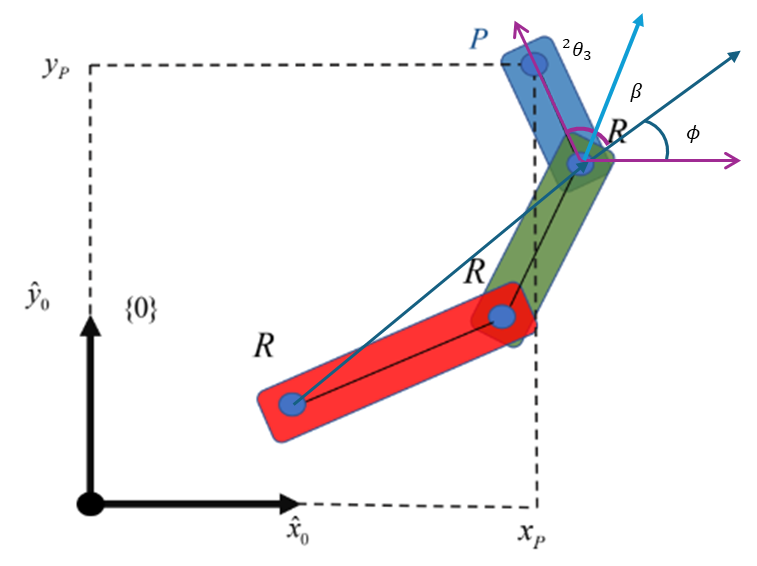


$$\beta +\phi ={\;}^1 \theta_2 +{\;}^0 \theta_1$$

$$\beta ={\;}^1 \theta_2 +{\;}^0 \theta_1 -\phi \;$$

$$\beta ={\;}^1 \theta_2 -\alpha \;$$

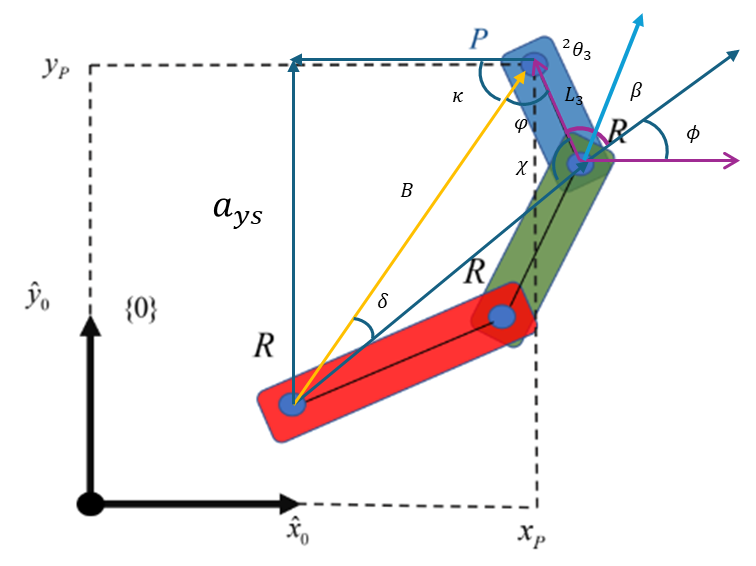


Ley de senos


$$\frac{\sin \left(\chi \right)}{B}=\frac{\sin \left(\varphi \right)}{R}=\frac{\sin \left(\delta \right)}{L_3 }$$

Ley de cosenos


$$R^2 =B^2 +L_3^2 -2BL_3 \cos \left(\varphi \right)$$

$$L_3^2 =R^2 +B^2 -2\mathrm{BR}\cos \left(\delta \;\right)$$

$$B^2 =R^2 +L_3^2 -2L_3 \mathrm{Rcos}\left(\chi \;\right)$$

Empleando el teorema de Pitágoras, se determina la longitud del segmento B


$$B=\sqrt{a_{\mathrm{xs}}^2 +a_{\mathrm{ys}}^2 }$$

Despejando el ángulo $\chi$ empleando la Ley de cosenos y dado que la suma de los ángulos $\chi ,\beta$ y $\theta_{2,3}$ dan como resultado $\pi$.


$$\chi =\mathrm{arcos}\left(\frac{B^2 -L_3^2 -R^2 }{-2{R\;L}_3 }\right)$$

$$\theta_{2,3} =\pi -\chi -\beta$$

Para determinar el valor del ángulo $\kappa$, se emplea la definición de tangente


$$\tan \left(\kappa \right)\frac{a_{\textrm{ys}} }{a{\;}_{\textrm{xs}} }$$

$$\kappa =\tan^{=1} \left(\frac{a_{\textrm{ys}} }{a_{\textrm{xs}} }\right)=\textrm{atan2}\left(a_{\textrm{ys},} ,a_{\textrm{xs}} \right)$$

Considerando la relación entre los ángulos se obtiene:


$$\delta =\kappa -\phi$$

De manera que se definen de manera completa los ángulos de las articulaciones del robot, para llegar a la configuración deseada del punto P en el plano de trabajo.


$$\theta_{2,3} =\pi -\chi -\beta$$

$$\theta_{O,1} =\phi -\alpha \;$$

$$\theta_{1,2} =\pi -\mathrm{acos}\left(\frac{R^2 -L_1^2 -L_2^2 }{2L_1 L_2 }\right)$$
<a id="TMP_2042"></a>

### Modelo cinemático directo de las velocidades

En la cinemática directa de las velocidades, las entradas son los movimientos que realizan las articulaciones, mientras que la salida muestra el cambio del vector de pose del efecto final. El jacobiano presente en el modelo representa una matriz de sensibilidad, describiendo cómo los cambios en las velocidades de las articulaciones afectan directamente el movimiento del efector. Este modelo se utiliza comúnmente en el diseño y control de trayectorias \[3\].


In [13]:
syms J_theta

J_theta

In [14]:
J_theta = jacobian(xi_O_P,[theta_O_1, theta_1_2,theta_2_3])

In [15]:
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3
x_dot = [theta_dot_O_1; theta_dot_1_2; theta_dot_2_3]


Al derivar el vector de postura, las relaciones geométricas anteriores se rompen y se establecen nuevas relaciones diferenciales.


$$\dot{x} =J\left(\theta \right)\dot{\theta}$$

In [16]:
xi_dot = J_theta * x_dot


Donde:


 $\theta$: Vector de velocidades articulares


x: Vector de velocidad lineal y angular de la posicion


 $J\left(\theta \;\right)$: Jacobiano


El Jacobiano representa físicamente la velocidad lineal que se presenta por el movimiento de cada articulación, de modo que:

-  La primera columna representa la velocidad lineal provocada por la articulación $\theta {\;}_{O,1}$
-  La segunda columna representa la velocidad lineal provocada por la articulación $\theta {\;}_{1,2}$
-  La tercera columna representa la velocidad lineal provocada por la articulación $\theta {\;}_{2,3}$

De manera similar, las filas corresponden a las a los componentes de dichas velocidades. La primer fila representa los componentes en X, la segunda los componentes en Y, finalmente la tercera fila los componentes en Z.

### Modelo cinemático inverso de las velocidades

Para este modelo, las variables de articulación se determinan en función de la configuración deseada del efector final.


La cinemática inversa de las velocidades toma como entrada los cambios en la posición y orientación del efecto final, y proporciona como salida el movimiento necesario de las articulaciones para llegara dicha postura. Este tipo de cinemática se utiliza para obtener el control preciso de las articulaciones para lograr un control preciso del manipulador.


Para obtener las velocidades articulares, se despeja el vector θ˙de la expresión de la cinemática directa de velocidades. Multiplicamos por ambos lados de la igualdad la inversa del jacobiano lo cual permite aislar las velocidades articulares:


$$\dot{\theta} ={J\left(\theta \right)}^{-1} \dot{x}$$

In [17]:
inv(J_theta)


Donde:


 $\theta$: Vector de velocidades articulares


x: Vector de velocidad lineal y angular de la posicion


 ${J\left(\theta \;\right)}^{-1}$: Jacobiano


In [18]:
J_inv_sim = simplify(inv(J_theta))

In [19]:
theta_dot = inv(J_theta) * x_dot

<a id="TMP_2fe6"></a>

### Modelo cinemático de las aceleraciones

A partir del modelo cinemático de las velocidades, se aplica el operador de derivada total,


$$\dot{x} =J\left(\theta \right)\dot{\theta}$$

Como resultado se obtiene la siguiente expresión de la aceleración del efector final:


$${\;}^0 {\ddot{\;\xi } }_P =\frac{\mathrm{d}}{\mathrm{d}t}{\;}^0 {\dot{\;\xi } }_P =\frac{\partial }{\partial {\;}^0 \theta_1 }{\;}^0 {\dot{\xi} }_P \left({\;}^0 {\dot{\;\theta } }_1 \right)+\frac{\partial }{\partial {\;}^0 \theta_1 }{\;}^0 {\dot{\xi} }_P \left({\;}^0 {\ddot{\theta} }_1 \right)$$

$$\ddot{x} =\dot{J} \left(\theta \right)\cdot \dot{\theta} +J\left(\theta \right)\cdot \ddot{\theta}$$

Para obtener el modelo cinemático directo, es necesario derivar el Jacobiano. Aplicando la regla de la cadena, considerando que cada elemento del Jacobiano depende de los ángulos que tomen las articulaciones, que dependen de la posición que se requiera.


$$\dot{J} \left(\theta \;\right)=\frac{\mathrm{d}}{\mathrm{d}t}J\left(\theta \right)=\sum_{i=1}^n \frac{\partial J}{\partial \theta_i }\cdot \dot{\theta {\;}_i }$$


In [20]:
J_theta_diff = (diff(J_theta, theta_O_1)*theta_dot_O_1+diff(J_theta,theta_1_2)*theta_dot_1_2+diff(J_theta,theta_2_3)*theta_dot_2_3)


Para completar el modelo cinemático de las aceleraciones, es necesario derivar el vector de velocidades articulares.


In [21]:
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3
x_ddot = [theta_ddot_O_1; theta_ddot_1_2; theta_ddot_2_3]


Con este vector columna es posible formar la expresión para la aceleración del efector final


$$\ddot{x} =\dot{J} \left(\theta \right)\cdot \dot{\theta} +J\left(\theta \;\right)\cdot \ddot{\theta}$$

In [22]:
xi_ddot = (J_theta_diff * x_dot) + (J_theta * x_ddot)

### Modelo cinematico inverso de las aceleraciones

A partir del modelo cinemático de las velocidades


$$\dot{\;\theta } =J^{-1} \left(\theta \right)\cdot \dot{x}$$

Aplicando el operador de derivada total, se obtiene la expresión para de la aceleración de las articulaciones


$$\ddot{\;\theta } =J^{-1} \left(\theta \right)\cdot \dot{x} \;+J^{-1} \left(\theta \;\right)\cdot \ddot{x}$$

In [23]:
theta_ddot = simplify(inv(J_theta)*x_dot)+(inv(J_theta)*xi_ddot)

<a id="TMP_16c1"></a>

## Modelo dinámico por ecuaciones de Eüler\-Lagrange

Para desarrollar este apartado del modelo dinámico, se utiliza el método de Euler\-Lagrange, el cual parte del principio de conservación de la energía total del sistema. Esta energía total se expresa como la suma de la energía cinética y la energía potencial. Durante el movimiento del manipulador, estas dos formas de energía se transforman entre sí, pero su suma permanece constante. Es decir, cuando la energía potencial aumenta, la energía cinética disminuye en la misma proporción, y viceversa.


Se empleara la siguiente ecuación para el cálculo de la energía cinética:


$$k_i =\frac{m_i }{2}{\mathbf{v}}_{C_i }^T {\mathbf{v}}_{C_i } +\frac{1}{2}{\mathbf{\omega }}_{C_i }^T {\mathbf{I}}_{C_i } {\mathbf{\omega }}_{C_i }$$

Para obtener el modelo con el cálculo de la posición del centro de gravedad, se obtienen primero las trasformadas de cada punto de interés, suponiendo que el centro de masa de cada eslabón se encuentra justo en su punto medio. Se considera que el sistema de referencia asociado al centro de gravedad está orientado de manera idéntica al sistema de coordenadas del eslabón correspondiente.

### Derivada de la posición

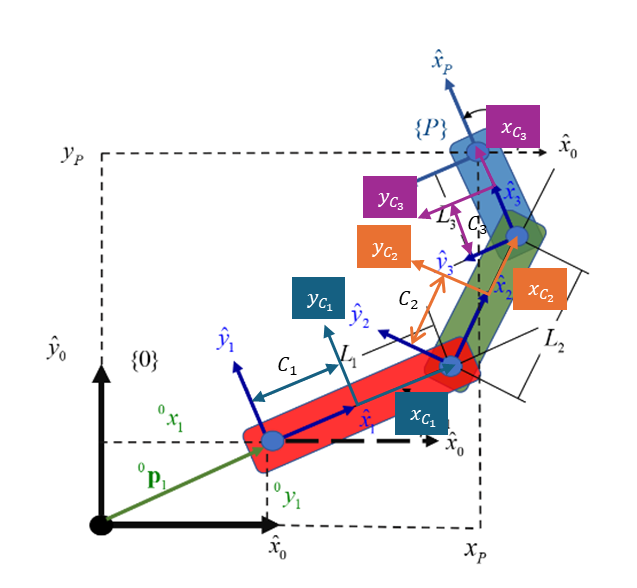


Calculando la transformada de C1


In [24]:
syms x_1_C1 x_2_C2 x_3_C3

T_1_C1 = Tij(x_1_C1,0,0,0,0,0)


Calculando la transformada para C2


In [25]:
T_2_C2 = Tij(x_2_C2,0,0,0,0,0)


Calculando la transformada para C3


In [26]:
T_3_C3 = Tij(x_3_C3,0,0,0,0,0)


Para obtener las trasformadas desde el origen, multiplicamos la trasformadas de las juntas, que ya se obtuvieron anteriormente, por estas nuevas.


In [27]:
T_O_C1 = T_O_1*T_1_C1

In [28]:
T_O_C2 = T_O_1*T_1_2*T_2_C2

In [29]:
T_O_C3 = T_O_1*T_1_2*T_2_3*T_3_C3

<a id="TMP_50b8"></a>

## Cálculo de la posición de los centros de masa

Obteniendo los vectores de posición


In [30]:
%Vectores de posición
p_O_C1 = [T_O_C1(1,4);T_O_C1(2,4);T_O_C1(3,4)]

In [31]:
p_O_C2 = simplify([T_O_C2(1,4);T_O_C2(2,4);T_O_C2(3,4)])

In [32]:
p_O_C3 = simplify([T_O_C3(1,4);T_O_C3(2,4);T_O_C3(3,4)])

<a id="TMP_5d0e"></a>

## Cálculo de las velocidades

Para obtener las velocidades, se deriva cada uno de los vectores de posición


In [33]:
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3

v_O_C1 = diff(p_O_C1,theta_O_1)*theta_dot_O_1+diff(p_O_C1,theta_1_2)*theta_dot_1_2+diff(p_O_C1,theta_2_3)*theta_dot_2_3

In [34]:
v_O_C2 = diff(p_O_C2,theta_O_1)*theta_dot_O_1+diff(p_O_C2,theta_1_2)*theta_dot_1_2+diff(p_O_C2,theta_2_3)*theta_dot_2_3

In [35]:
v_O_C3 = diff(p_O_C3,theta_O_1)*theta_dot_O_1+diff(p_O_C3,theta_1_2)*theta_dot_1_2+diff(p_O_C3,theta_2_3)*theta_dot_2_3

## Cálculo de la velocidades angulares
### Propagacion de velocidades

Para obtener el modelo dinamico mediante propagacion de velocidades se emplean las expresiones siguientes:

#
### Propagacion de velocidades lineales

$${\;}^{i+1} v_{i+1} ={\;}^{i+1} R_i \left({\;}^i v_i +{\;}^i \omega_i \times {\;}^i p_{i+1} \right)$$
#
### Propagacion de velocidades angulares

$${\;}^{i+1} \omega_{i+1} ={\;}^{i+1} R_i {\;}^i \omega_i +{\;}^{i+1} {\hat{\;Z} }_{i+1} {\dot{\theta \;} }_{i+1}$$

Se obtienen las matices de orientación de cada uno de los sistemas colocados en las juntas y se transponen. Estos datos se obtienen de la matriz de trasformaciones de cada junta con respecto al punto inmediato anterior


Para ${\;}^0 R_1$


In [36]:
R_O_1 = [T_O_1(1,1),T_O_1(1,2),T_O_1(1,3);T_O_1(2,1),T_O_1(2,2),T_O_1(2,3);T_O_1(3,1),T_O_1(3,2),T_O_1(3,3)]

In [37]:
R_1_O = transpose(R_O_1)


Para ${\;}^1 R_2$


In [38]:
R_1_2 = [T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)]

In [39]:
R_2_1 = transpose(R_1_2)


Para ${\;}^2 R_3$


In [40]:
R_2_3 = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]

In [41]:
R_3_2 = transpose(R_2_3)


Para obtener las velocidades lineales de los centros de masa, es necesario calcular previamente las velocidades angulares de cada eslabón.


In [42]:
syms omega_1_1 omega_2_2 omega_3_3
%Propagación para el primer cuerpo
omega_1_1

In [43]:
omega_O_O = [0;0;0]

omega_O_O = 3x1
     0
     0
     0

In [44]:
n_1_1 = [0;0;1]

n_1_1 = 3x1
     0
     0
     1

In [45]:
%Ecuación de propagación
omega_1_1 = R_1_O*omega_O_O+n_1_1*theta_dot_O_1

In [46]:
%Propagación para el segundo cuerpo
omega_2_2

In [47]:
n_2_2 = [0;0;1]

n_2_2 = 3x1
     0
     0
     1

In [48]:
%Ecuación de propagación
omega_2_2 = R_2_1*omega_1_1+n_2_2*theta_dot_1_2

In [49]:
%Propagación para el tercer cuerpo
omega_3_3

In [50]:
n_3_3 = [0;0;1]

n_3_3 = 3x1
     0
     0
     1

In [51]:

%Ecuación de propagación
omega_3_3 = R_3_2*omega_2_2+n_3_3*theta_dot_2_3


La velocidad lineal del sistema 1 está dada por:


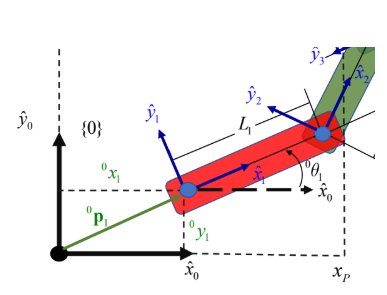


$${\;}^1 V_1 ={\;}^1 R_0 \left({\;}^0 V_0 +{\;}^0 \omega_0 \times {\;}^0 P_1 \right)$$

$${\;}^1 V_1 =\left\lbrack \begin{array}{ccc} \cos \left({\;}^0 \theta_1 \right) & \sin \left({\;}^0 \theta_1 \right) & 0\newline -\sin \left({\;}^0 \theta_1 \right) & \cos \left({\;}^0 \theta_1 \right) & 0\newline 0 & 0 & 1 \end{array}\right\rbrack \left(\left\lbrack \begin{array}{c} 0\newline 0\newline 0 \end{array}\right\rbrack +\left\lbrack \begin{array}{c} 0\newline 0\newline 0 \end{array}\right\rbrack \times \left\lbrack \begin{array}{c} {\;}^0 x_1 \newline {\;}^0 y_1 \newline 0 \end{array}\right\rbrack \right)=\left\lbrack \begin{array}{c} 0\newline 0\newline 0 \end{array}\right\rbrack$$

Para el sistema 1 se tiene


In [52]:
syms L1
V_1_1 = [0; 0; 0;]

V_1_1 = 3x1
     0
     0
     0



Para el sistema 2 se tiene


In [53]:
V_2_2 = R_2_1 * (V_1_1 + cross(omega_1_1,[L1; 0; 0;]))


Para el sistema 3 se tiene


In [54]:
syms L2
V_3_3 = R_3_2 * (V_2_2 + cross(omega_2_2,[L2; 0; 0;]))


Para calcular la propagación de velocidades hacia los centros de masa, se utiliza la misma formulación aplicada en la propagación entre juntas, con la consideración adicional de que las velocidades angulares en el centro de masa de cada eslabón son iguales a las de su sistema de coordenadas asociado a la junta correspondiente.


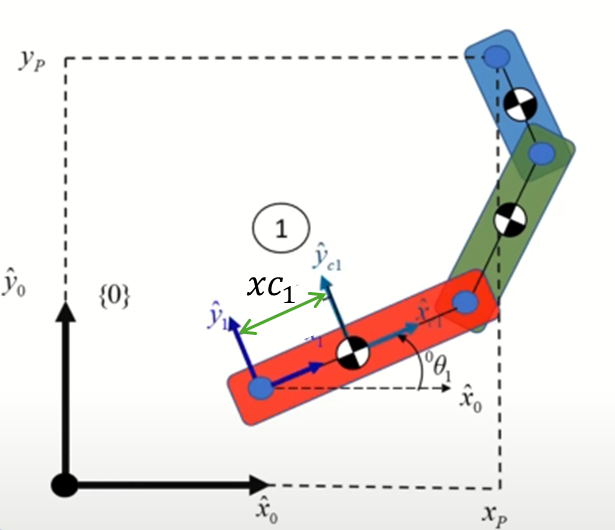


$${\;}^{\mathrm{cl}} V_{\mathrm{cl}} ={\;}^{\mathrm{cl}} R_1 \left({\;}^1 V_1 +{\;}^1 \omega_1 \times {\;}^1 P_{\mathrm{cl}} \right)$$

$${\;}^1 V_1 =\left\lbrack \begin{array}{ccc} 1 & 0 & 0\newline 0 & 1 & 0\newline 0 & 0 & 1 \end{array}\right\rbrack \left(\left\lbrack \begin{array}{c} 0\newline 0\newline 0 \end{array}\right\rbrack +\left\lbrack \begin{array}{c} 0\newline 0\newline \dot{{\;}^0 \theta_1 }  \end{array}\right\rbrack \times \left\lbrack \begin{array}{c} {\mathrm{xc}}_1 \newline 0\newline 0 \end{array}\right\rbrack \right)=\left\lbrack \begin{array}{c} 0\newline {\mathrm{xc}}_1 \cdot \dot{{\;}^0 \theta_1 } \newline 0 \end{array}\right\rbrack$$

$${\;}^1 \omega_1 =\omega_1 =\left\lbrack \begin{array}{c} 0\newline 0\newline \dot{{\;}^0 \theta_1 }  \end{array}\right\rbrack$$

Para el centro de masa del primer eslabón.


In [55]:
syms x_1_C1 theta_dot_O_1

v_C1_C1 = [0;x_1_C1*theta_dot_O_1;0]


Para el centro de masa del segundo eslabón.


In [56]:
V_C2_C2 = ([1 0 0; 0 1 0; 0 0 1;]*(V_2_2+cross(omega_2_2,[x_2_C2; 0; 0;])))


Para el centro de masa del tercer eslabón.


In [57]:
V_C3_C3 = ([1 0 0; 0 1 0; 0 0 1;]*(V_3_3+cross(omega_3_3,[x_3_C3; 0; 0;])))


Para estas velocidades, la matriz de orientación es la matriz identidad debido a que el sistema de la junta no cambia con respecto al del centro de masa.


In [58]:

v_O_C1 = [-x_1_C1*sin(theta_O_1)*theta_dot_O_1;x_1_C1*cos(theta_O_1)*theta_dot_O_1;0]


De este modo se obtienen las velocidades del primer sumando de la energia cinetica.


Para el segundo sumando de la energía cinética, se definen las matrices de inercia de cada eslabón respecto a su centro de masa. Debido a que los eslabones son rígidos y simétricos respecto al plano de movimiento, las matrices de inercia, solo presentan valores en su diagonal principal.

<a id="TMP_7b5e"></a>

## Definición de los elementos de inercia

In [59]:
syms g I_xx1 I_yy1 I_zz1 I_xx2 I_yy2 I_zz2 I_xx3 I_yy3 I_zz3
%vector de gravedad
g_v = [0;-g;0]

In [60]:
I_C1 = [I_xx1,0,0;0,I_yy1,0;0,0,I_zz1]

In [61]:
I_C2 = [I_xx2,0,0;0,I_yy2,0;0,0,I_zz2]

In [62]:
I_C3 = [I_xx3,0,0;0,I_yy3,0;0,0,I_zz3]


Con esta informacion se pude calcular la energia cinetica del sistema, mediante propagacion de velocidades y mediante la derivada de la posicion del centro de masa.

#### Energia cinetica mediante propagacion de velocidades

Para el eslabón 1


In [63]:
syms m_1 m_2 m_3
%energía cinética de cada uno de los cuerpos

k_1 = simplify((m_1/2)*transpose(v_O_C1)*v_O_C1+(1/2)*transpose(omega_1_1)*I_C1*omega_1_1)


Para el eslabón 2


In [64]:
k_2 = simplify((m_2/2)*transpose(v_O_C2)*v_O_C2+(1/2)*transpose(omega_2_2)*I_C2*omega_2_2)


Para el eslabón 3


In [65]:
k_3 = simplify((m_3/2)*transpose(v_O_C3)*v_O_C3+(1/2)*transpose(omega_3_3)*I_C3*omega_3_3)


La energia potencial de cada eslabón se calcula empleando la expresión:


$$U_i =m_i \cdot g^T \cdot r_{\textrm{ci}}$$

Donde:


 $U_i :$ Energía potencial del eslabón


 $m_i :$ Masa del eslabón


 $g:$ Vector de aceleración gravitacional


 $r_{\textrm{ci}} :$ Vector posición del centro de masa del eslabón


In [66]:
% Cáclulo de la energía potencial de cada cuerpo
u_1 = -m_1*transpose(p_O_C1)*g_v

In [67]:
u_2 = -m_2*transpose(p_O_C2)*g_v

In [68]:
u_3 = -m_3*transpose(p_O_C3)*g_v


La energía potencial se considera negativa, ya que representa la energía que el sistema va perdiendo al moverse en la dirección del campo gravitacional.

### Cálculo del Lagrangeano

Con la energía cinética $T$ y la energía potencial $E$ previamente definida, se puede calcular el Lagrangiano del sistema mediante la siguiente expresión:


$$\Gamma =T-U$$

$$\Gamma =\left(k_1 +k_2 +k_3 \right)-\left(u_1 +u_2 +u_3 \right)$$

Donde:


 $\Gamma \;:$ Lagrangiano.


 $T:$ Energía cinética total.


 $k_1 ,k_2 ,k_3 :$ Energia cinetica de cada eslabón.


 $U:$ Energía potencial total (negativa por convención gravitacional).


 $u_1 ,u_2 ,u_3 :$ Energia potencial de cada eslabón


In [69]:
La = (k_1+k_2+k_3)-(u_1+u_2+u_3)

<a id="TMP_0ca3"></a>

## Cálculo de los pares

Para calcular el par requerido por cada una de las juntas rotacionales, se utiliza el modelo dinámico obtenido a través del modelo de Euler\-Lagrange. Este método permite calcular los necesarios para generar un movimiento específico en el robot, a partir de la energía cinética y potencial del sistema.


$$\tau =\frac{\partial }{\partial t}\left(\frac{\partial }{\partial \dot{\theta} }\Gamma \right)-\left(\frac{\partial }{\partial \theta }\Gamma \right)$$

Como primer paso para aplicar el método de Euler\-Lagrange, se obtiene la derivada parcial del Lagrangiano L con respecto a la velocidad angular de la articulación.


Para la junta con el sistema 1


In [70]:
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3

D_theta1 = diff(La,theta_dot_O_1)


Simultáneamente, se calcula la derivada parcial del Lagrangiano con respecto a la posición angular $\theta_i$


In [71]:

% Cálculo de relación

tao_1 = diff(D_theta1,theta_O_1)*theta_dot_O_1 + diff(D_theta1,theta_1_2)*theta_dot_1_2 + diff(D_theta1,theta_2_3)*theta_dot_2_3 + diff(D_theta1,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta1,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta1,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_O_1)


El proceso anterior se repite para el eslabon 2 y 3.


In [72]:

D_theta2 = diff(La,theta_dot_1_2)

In [73]:
tao_2 = diff(D_theta2,theta_O_1)*theta_dot_O_1 + diff(D_theta2,theta_1_2)*theta_dot_1_2 + diff(D_theta2,theta_2_3)*theta_dot_2_3 + diff(D_theta2,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta2,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta2,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_1_2)

In [74]:

D_theta3 = diff(La,theta_dot_2_3)

In [75]:
tao_3 = diff(D_theta3,theta_O_1)*theta_dot_O_1 + diff(D_theta3,theta_1_2)*theta_dot_1_2 + diff(D_theta3,theta_2_3)*theta_dot_2_3 + diff(D_theta3,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta3,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta3,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_2_3)


Después se obtiene el vector de pares, que agrupa los pares requeridos en cada una de las juntas rotacionales del robot. Cada componente de este vector representa el par necesario en una articulación específica para compensar los efectos dinámicos.


Este vector se expresa como:


$$\tau =\left\lbrack \begin{array}{c} \tau_{O,1} \newline \tau_{1,2} \newline \tau_{2,3}  \end{array}\right\rbrack$$

In [76]:

tao = [tao_1;tao_2;tao_3]


Del vector de pares se obtiene la matriz de inercia que indica cómo responde dinámicamente el sistema cuando se aplican aceleraciones articulares.


La matriz de inercia se obtiene derivando el vector de pares respecto a las aceleraciones articulares:


$$M\left(\theta \right)=\frac{\partial }{\partial \ddot{\;\theta } }\tau$$

Para la aceleración articular de $\theta {\;}_{O,1} \;$


In [77]:
% Cálculo de la matriz de inercia

M1 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[1,0,0,0,0,0,0])


Para la aceleración articular de $\theta {\;}_{1,2} \;$


In [78]:
M2 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,1,0,0,0,0,0])


Para la aceleración articular de $\theta {\;}_{2,3} \;$


In [79]:
M3 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,1,0,0,0,0])


Por lo que la matriz de aceleraciones articulares resulta de la siguiente manera


In [80]:

M_theta = collect([M1 M2 M3],[m_1,m_2,m_3])


Se elimina el vector de pares, ya que incluye la fuerza centrífuga y de coriolis. Esto se realiza cuando se sustituyen todas las aceleraciones articulares y posiciones articulares con 0.


In [81]:
V_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,0])


Por último, se eliminan los efectos gravitacionales del vector de pares, haciendo cero todo las velocidades y aceleraciones de las articulaciones.


In [82]:
G_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,0,0,0,g])

## Cálculo del modelo dinámico

El modelo dinamico se divide en el modelo directo y el inverso.

### Modelo dinamico directo

El modelo dinámico directo implica determinar el movimiento del manipulador $\ddot{\theta}$ cuando se tiene el vector de entrada $\tau \;$ y los estados conocidos de $\left(\theta \;,\dot{\;\theta \;} \right)$. El modelo dinamico directo permite calcular las aceleraciones articulares resultantes a partir de los torques aplicados, considerando la posición y la velocidad actual del sistema. Dicha relación esta dada por la expresión:


$$\ddot{\;\theta \;} =M^{-1} \left(\theta \right)\left\lbrack \tau -V\left(\theta ,\ddot{\theta} \right)-G\left(\theta \right)\right\rbrack$$

Donde:


 $\ddot{\;\theta \;} :$ Vector de aceleraciones articulares


 $M^{-1} :$ Matriz de inercia inversa del sistema


 $\tau :$ Vector de pares aplicados en las articulaciones


 $V\left(\theta ,\ddot{\theta} \right):$ Matriz con fuerzas centrífugas y de Coriolis


 $G\left(\theta \right):$ Vector de pares gravitacionales

### Modelo dinamico inverso

Este permite calcular los pares necesarios en las articulaciones para generar un movimiento deseado, es decir, una trayectoria definida por $\theta \;,\dot{\theta} ,\ddot{\theta \;}$. Dicho modelo se representa mediante la siguiente expresión.


$$\tau =M\left(\theta \right)\cdot \theta +V\left(\theta ,\ddot{\theta} \right)+G\left(\theta \right)$$

Donde:


 $\tau :$ Vector de pares requeridos en las articulaciones


 $M\left(\theta \right):$ Matriz de iniercia del sistema


 $V\left(\theta ,\ddot{\theta} \right):$ Matriz con fuerzas centrífugas y de Coriolis


 $G\left(\theta \right):$ Vector de pares gravitacionales


 $\dot{\theta} :$ Vector de posiciones angulares


 $\ddot{\;\theta \;} :$ Vector de aceleraciones angulares

## Referencias

\[1\] Peng, Sijia & Hu, Teng. (2025). Kinematic Analysis of SCARA Robots. Journal of Computing and Electronic Information Management. 17. 51\-57. 10.54097/zn4qh681.


\[2\] Farah, Edris & Shaogang, Liu. (2018). An Efficient approach for Manipulator Robot dynamics modeling. 1\-5. 10.1109/ICCCEEE.2018.8515879.


\[3\] G. B. Muniyandi, Muniyandi GB (2024) In\-Depth Analysis of Kinematic, Dynamic, and Control Aspects of a 4\-Axis SCARA Robot Manipulator, Int J Robot Eng, vol. 7, p. 37, 2024, doi: 10.35840/2631\-5106/4137.

